imports

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


## Check data

In [2]:
data = pd.read_csv('./data/cox-violent-parsed_filt.csv')
print(data.shape)

#remove this column because 100% NaN
data = data.drop("violent_recid", axis=1)
#remove name column (because their is last and first)
data = data.drop("name",axis=1)
#remove all duplicate rows
data = data.drop_duplicates()
#remove type_of_assessment (because only one unique value) same for v_type_of_assessment
data = data.drop("type_of_assessment", axis=1)
data = data.drop("v_type_of_assessment", axis=1)
data.to_csv("./data/clean_data.csv", index=False)
data.head()


(18316, 40)


,id,first,last,sex,dob,age,age_cat,race,juv_fel_count,decile_score,...,vr_charge_degree,vr_offense_date,vr_charge_desc,decile_score.1,score_text,screening_date,v_decile_score,v_score_text,priors_count.1,event
0,1.0,miguel,hernandez,Male,18/04/1947,69,Greater than 45,Other,0,1,...,NaN,NaN,NaN,1,Low,14/08/2013,1,Low,0,0
1,2.0,miguel,hernandez,Male,18/04/1947,69,Greater than 45,Other,0,1,...,NaN,NaN,NaN,1,Low,14/08/2013,1,Low,0,0
2,3.0,michael,ryan,Male,06/02/1985,31,25 - 45,Caucasian,0,5,...,NaN,NaN,NaN,5,Medium,31/12/2014,2,Low,0,0
3,4.0,kevon,dixon,Male,22/01/1982,34,25 - 45,African-American,0,3,...,(F3),05/07/2013,Felony Battery (Dom Strang),3,Low,27/01/2013,1,Low,0,1
4,5.0,ed,philo,Male,14/05/1991,24,Less than 25,African-American,0,4,...,NaN,NaN,NaN,4,Low,14/04/2013,3,Low,4,0


distribution des ethnies au sein des récidivistes

In [3]:
data_recid_eth = data[data['event'] == 1]['race']
data_recid_sex = data[data['event'] == 1]['sex']
data_recid_age = data[data['event'] == 1]['age']

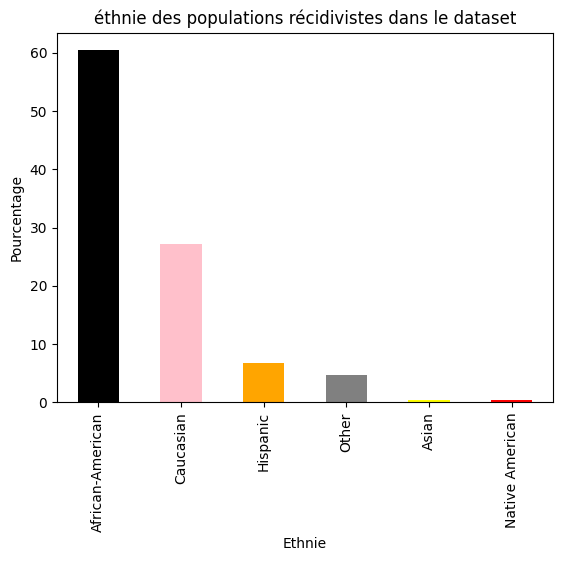

In [4]:
value_counts_eth = data_recid_eth.value_counts(normalize=True) * 100

value_counts_eth.plot(kind='bar', color=['black', 'pink', 'orange', 'gray', 'yellow', 'red'])
plt.xlabel('Ethnie')
plt.ylabel('Pourcentage')
plt.title('éthnie des populations récidivistes dans le dataset')
plt.show()

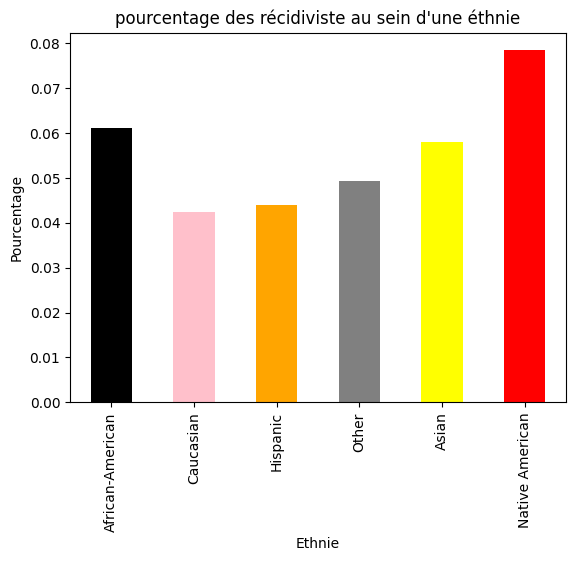

In [5]:
value_counts_eth = data_recid_eth.value_counts() / data['race'].value_counts()

value_counts_eth.plot(kind='bar', color=['black', 'pink', 'orange', 'gray', 'yellow', 'red'])
plt.xlabel('Ethnie')
plt.ylabel('Pourcentage')
plt.title("pourcentage des récidiviste au sein d'une éthnie")
plt.show()

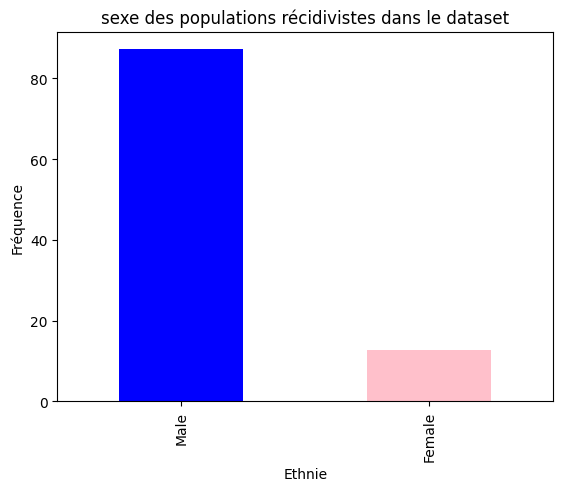

In [6]:
value_counts_sex = data_recid_sex.value_counts(normalize=True) * 100
value_counts_sex.plot(kind='bar', color = ['blue', 'pink'])
plt.xlabel('Ethnie')
plt.ylabel('Fréquence')
plt.title('sexe des populations récidivistes dans le dataset')
plt.show()

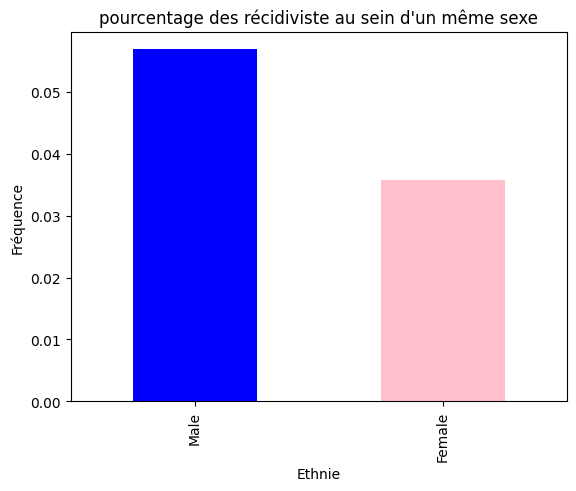

In [7]:
value_counts_sex = data_recid_sex.value_counts() / data['sex'].value_counts()

value_counts_sex.plot(kind='bar', color = ['blue', 'pink'])
plt.xlabel('Ethnie')
plt.ylabel('Fréquence')
plt.title("pourcentage des récidiviste au sein d'un même sexe")
plt.show()

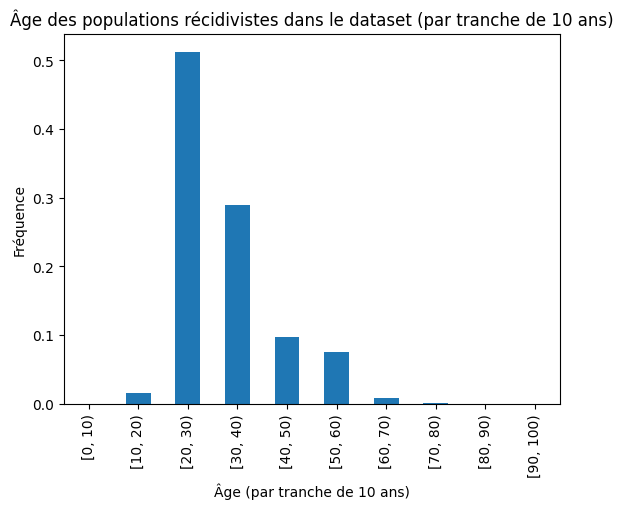

In [8]:
age_bins = pd.cut(data_recid_age, bins=range(0, 101, 10), right=False)

value_counts_age = age_bins.value_counts(normalize=True)
value_counts_age = value_counts_age.sort_index()

value_counts_age.plot(kind='bar')
plt.xlabel('Âge (par tranche de 10 ans)')
plt.ylabel('Fréquence')
plt.title('Âge des populations récidivistes dans le dataset (par tranche de 10 ans)')
plt.show()

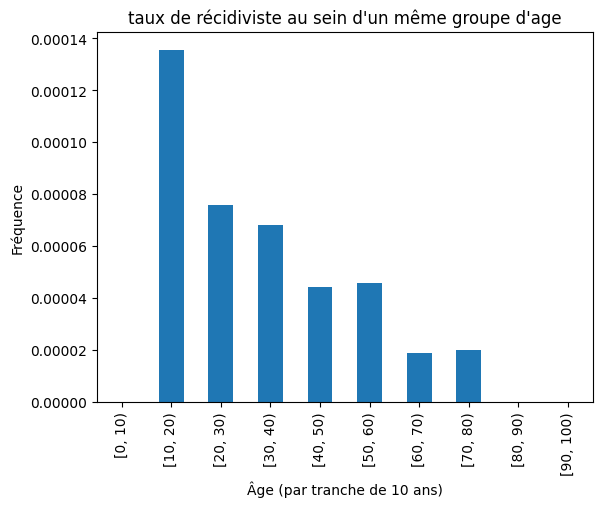

In [9]:
age_bins = pd.cut(data_recid_age, bins=range(0, 101, 10), right=False)
age_bins_tot = pd.cut(data['age'], bins=range(0, 101, 10), right=False)

value_counts_age = age_bins.value_counts(normalize=True) / age_bins_tot.value_counts()

value_counts_age = value_counts_age.sort_index()

value_counts_age.plot(kind='bar')
plt.xlabel('Âge (par tranche de 10 ans)')
plt.ylabel('Fréquence')
plt.title("taux de récidiviste au sein d'un même groupe d'age")
plt.show()